# 🦁 Análisis de Estabilidad en Sistemas No Lineales: El Modelo Lotka-Volterra

## 🎯 Objetivo

Aplicar el método de **Linealización** para analizar la estabilidad de los puntos de equilibrio de un sistema dinámico **no lineal**. Utilizaremos el **Modelo Depredador-Presa de Lotka-Volterra** como ejemplo central.

## 📝 Fundamento: La Linealización

Dado que los sistemas no lineales no se pueden resolver analíticamente (no tienen una solución general simple), analizamos su comportamiento cerca de sus **Puntos de Equilibrio** ($(\mathbf{x}_e, \mathbf{y}_e)$), donde $\mathbf{x'} = 0$ y $\mathbf{y'} = 0$.

Cerca de estos puntos, el sistema no lineal se comporta como un sistema lineal. La matriz que define este sistema lineal aproximado es la **Matriz Jacobiana**.

---

## 🐺 Caso de Estudio: Ecuaciones de Lotka-Volterra

Este modelo describe la dinámica de dos poblaciones acopladas:
* $\mathbf{x(t)}$: Población de la presa (ej. Conejos).
* $\mathbf{y(t)}$: Población del depredador (ej. Lobos).

$$
\begin{cases} \mathbf{x' = \frac{dx}{dt} = ax - bxy} \quad & \text{(La presa crece sola, pero decae por la interacción $xy$)} \\ \mathbf{y' = \frac{dy}{dt} = -cy + dxy} \quad & \text{(El depredador decae solo, pero crece por la interacción $xy$)} \end{cases}
$$
Donde $a, b, c, d$ son parámetros positivos. La no linealidad se debe a los términos de interacción $\mathbf{xy}$.

In [5]:
# Importación de librerías para cálculo simbólico y álgebra lineal
import sympy as sp
from sympy import symbols, Matrix, diff, solve, Eq

# Definición de variables de estado y parámetros
x, y = symbols('x y', positive=True)
a, b, c, d = symbols('a b c d', positive=True)

# Definición de las funciones del sistema (x' = f(x,y), y' = g(x,y))
f = a*x - b*x*y
g = -c*y + d*x*y

print("Funciones del sistema definidas.")
print(f"f(x,y) = {f}")
print(f"g(x,y) = {g}")

Funciones del sistema definidas.
f(x,y) = a*x - b*x*y
g(x,y) = -c*y + d*x*y


## Paso 1: Encontrar los Puntos de Equilibrio (Puntos Críticos)

Los puntos de equilibrio se encuentran al establecer las tasas de cambio a cero: $\mathbf{x'} = 0$ y $\mathbf{y'} = 0$.

$$
\begin{cases} \mathbf{f(x, y) = x(a - by) = 0} \quad & \text{(Ecuación 1)} \\ \mathbf{g(x, y) = y(-c + dx) = 0} \quad & \text{(Ecuación 2)} \end{cases}
$$

### A. Punto de Equilibrio 1: Extinción Mutua
De la Ecuación 1, si $x=0$. Sustituyendo en la Ecuación 2, $y(-c) = 0$, lo que implica $y=0$.
$$
\mathbf{E_1 = (0, 0)} \quad \text{(Punto de Extinción: Ninguna población sobrevive)}
$$

### B. Punto de Equilibrio 2: Coexistencia
De la Ecuación 1, si $a - by = 0 \quad \rightarrow \quad y = a/b$.
De la Ecuación 2, si $-c + dx = 0 \quad \rightarrow \quad x = c/d$.
$$
\mathbf{E_2 = \left(\frac{c}{d}, \frac{a}{b}\right)} \quad \text{(Punto Central: Ambas poblaciones coexisten)}
$$

## Paso 2: Construir la Matriz Jacobiana

La Matriz Jacobiana $\mathbf{J}$ es la matriz de derivadas parciales que se utiliza para linealizar el sistema alrededor de un punto crítico.

$$
\mathbf{J(x, y)} = \begin{pmatrix} \frac{\partial f}{\partial x} & \frac{\partial f}{\partial y} \\ \frac{\partial g}{\partial x} & \frac{\partial g}{\partial y} \end{pmatrix}
$$

### Cálculo de las Derivadas Parciales
1.  $\frac{\partial f}{\partial x} = a - by$
2.  $\frac{\partial f}{\partial y} = -bx$
3.  $\frac{\partial g}{\partial x} = dy$
4.  $\frac{\partial g}{\partial y} = -c + dx$

Por lo tanto:
$$
\mathbf{J(x, y)} = \begin{pmatrix} a - by & -bx \\ dy & -c + dx \end{pmatrix}
$$

In [2]:
# --- Cálculo Simbólico de la Jacobiana ---
J_x_x = diff(f, x)
J_x_y = diff(f, y)
J_y_x = diff(g, x)
J_y_y = diff(g, y)

J = Matrix([[J_x_x, J_x_y], [J_y_x, J_y_y]])

print("Matriz Jacobiana J(x, y):")
print(J)

Matriz Jacobiana J(x, y):
Matrix([[a - b*y, -b*x], [d*y, -c + d*x]])


## Paso 3: Análisis de Estabilidad en $E_2$ (Coexistencia)

Evaluaremos la estabilidad del punto de coexistencia $\mathbf{E_2 = \left(\frac{c}{d}, \frac{a}{b}\right)}$ sustituyendo sus coordenadas en la matriz Jacobiana $\mathbf{J}$.

$$
\mathbf{J}(E_2) = \begin{pmatrix} a - b\left(\frac{a}{b}\right) & -b\left(\frac{c}{d}\right) \\ d\left(\frac{a}{b}\right) & -c + d\left(\frac{c}{d}\right) \end{pmatrix}
$$

Simplificando:
$$
\mathbf{J}(E_2) = \begin{pmatrix} a - a & -b\frac{c}{d} \\ d\frac{a}{b} & -c + c \end{pmatrix} \quad \rightarrow \quad \mathbf{J}(E_2) = \begin{pmatrix} 0 & -\frac{bc}{d} \\ \frac{ad}{b} & 0 \end{pmatrix}
$$

In [6]:
# --- Cálculo de Autovalores de J(E₂) ---
# Determinante (λ² - Tr(J)λ + det(J) = 0)
# Traza (Tr): 0 + 0 = 0
# Determinante (det): (0)(0) - (-bc/d)(ad/b) = ac

# Ecuación Característica: λ² + ac = 0
lam = symbols('lambda')
ec_caracteristica = Eq(lam**2 + a*c, 0)

# Resolver para λ
autovalores = sp.solve(ec_caracteristica, lam)

# Mostrar los autovalores
print(f"Autovalores en E₂: {autovalores}")

# Como a y c son positivos, ac es positivo.
# Los autovalores son imaginarios puros: λ = ± i * sqrt(ac)

Autovalores en E₂: [-I*sqrt(a)*sqrt(c), I*sqrt(a)*sqrt(c)]


## 🌟 Interpretación de la Estabilidad

El tipo de estabilidad se determina por los autovalores de la Matriz Jacobiana evaluada en el punto crítico.

| Autovalores ($\lambda$) | Clasificación del Punto Crítico | Estabilidad | Comportamiento en el Retrato de Fase |
| :--- | :--- | :--- | :--- |
| $\lambda = \mathbf{i \beta}$ (Imaginarios Puros) | **Centro** | Estabilidad Débil (Marginal) | Las trayectorias **orbitan** el punto. No se acercan ni se alejan. |

### Conclusión para Lotka-Volterra

Para el punto de coexistencia $\mathbf{E_2}$:

* Los autovalores son **imaginarios puros** ($\mathbf{\lambda = \pm i \sqrt{ac}}$).
* Esto implica que $\mathbf{E_2}$ es un **Centro**.
* **Significado:** Las poblaciones de depredador y presa **oscilarán perpetuamente** alrededor del punto de equilibrio $\mathbf{E_2}$.

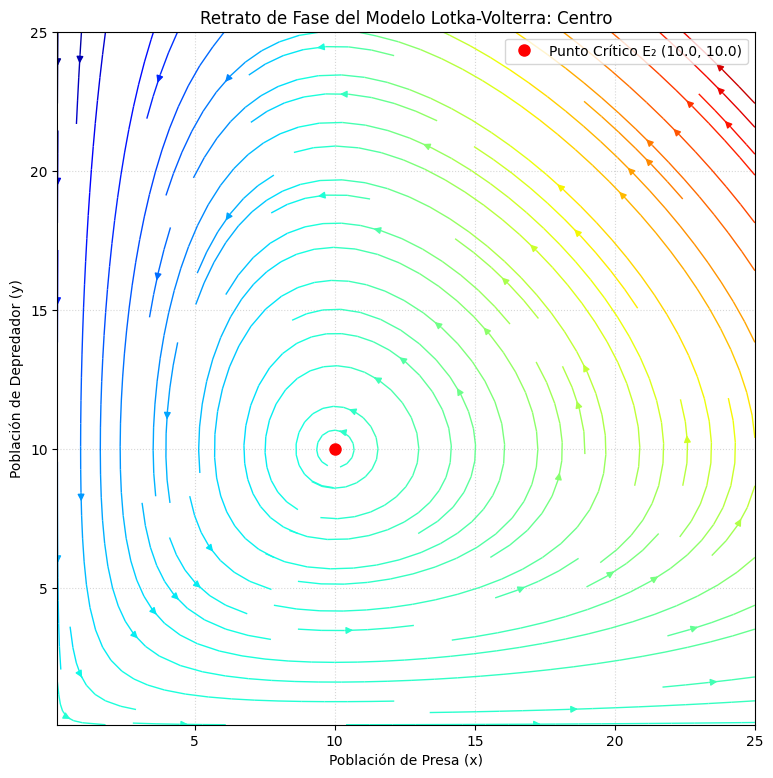

In [7]:
# Importación de librerías para la visualización
import numpy as np
import matplotlib.pyplot as plt

# --- Parámetros Numéricos (Ejemplo) ---
# Usamos valores para a, b, c, d
a_val, b_val, c_val, d_val = 1.0, 0.1, 1.0, 0.1

# El punto de equilibrio (E₂) es: (c/d, a/b) = (1.0/0.1, 1.0/0.1) = (10, 10)
# La tasa de cambio alrededor de (10, 10) es lo que analizamos.

# --- 1. Definición del Campo Vectorial ---
def lotka_volterra(X, Y, a, b, c, d):
    # X' = a*X - b*X*Y
    # Y' = -c*Y + d*X*Y
    U = a*X - b*X*Y
    V = -c*Y + d*X*Y
    return U, V

# --- 2. Malla y Rango ---
rango = 25
x_limit = np.linspace(0.1, rango, 30) # No se usa 0 porque el sistema lo elimina
y_limit = np.linspace(0.1, rango, 30)
X_grid, Y_grid = np.meshgrid(x_limit, y_limit)

# Calcular los vectores en la malla
U_vec, V_vec = lotka_volterra(X_grid, Y_grid, a_val, b_val, c_val, d_val)

# --- 3. Generación del Gráfico ---
plt.figure(figsize=(9, 9))
# Usamos streamplot para dibujar las trayectorias
plt.streamplot(X_grid, Y_grid, U_vec, V_vec, density=1.0, linewidth=1, color=V_vec, cmap='jet')

# Dibuja el punto crítico (E₂)
plt.plot(c_val/d_val, a_val/b_val, 'ro', markersize=8, label=f'Punto Crítico E₂ ({c_val/d_val}, {a_val/b_val})')

# Configuración y Títulos
plt.xlabel('Población de Presa (x)')
plt.ylabel('Población de Depredador (y)')
plt.title('Retrato de Fase del Modelo Lotka-Volterra: Centro')
plt.grid(True, linestyle=':', alpha=0.5)
plt.legend()
plt.show()

# 📊 Conclusión Analítica y Lectura del Retrato de Fase

Esta sección une el cálculo analítico de la **Matriz Jacobiana** (que dio como resultado autovalores imaginarios puros) con la **representación visual del Retrato de Fase**.

---

## 🔍 Análisis del Gráfico

El **Retrato de Fase** generado para el sistema **Lotka-Volterra** con los parámetros:

\[
a = 1.0, \quad b = 0.1, \quad c = 1.0, \quad d = 0.1
\]

es la herramienta definitiva para comprender la dinámica del sistema:

| **Elemento Gráfico**                | **Contexto Analítico**             | **Interpretación** |
|------------------------------------|-----------------------------------|--------------------|
| **Eje X (Presa, x)**               | Población \( x \)                 | Muestra la cantidad de conejos (presas) en un momento dado. |
| **Eje Y (Depredador, y)**          | Población \( y \)                 | Muestra la cantidad de lobos (depredadores) en un momento dado. |
| **Punto Crítico \( E_2 \) (Rojo)** | Centro (10, 10)                   | Representa el estado de equilibrio donde las poblaciones no cambian (\( \mathbf{x'} = 0, \mathbf{y'} = 0 \)). |
| **Trayectorias (Curvas Cerradas)** | Autovalores \( \pm i\sqrt{ac} \)  | Las curvas son órbitas perpetuas y cerradas que rodean el punto (10, 10). |

---

## ⚖️ Significado de la Estabilidad (Centro)

El análisis de la **Matriz Jacobiana** en el **Punto Crítico \( E_2 \)** reveló que los autovalores son **imaginarios puros**.  
Esto implica que \( \mathbf{E_2} \) es un **Centro**, lo que se traduce en:

- **Estabilidad Marginal:**  
  Las trayectorias no se acercan ni se alejan del punto (10, 10); simplemente lo orbitan indefinidamente.

- **Ciclo de Oscilación:**  
  El sistema es cíclico.  
  La población de la presa aumenta, lo que permite que el depredador crezca.  
  El crecimiento del depredador consume a la presa, lo que a su vez causa la caída del depredador, reiniciando el ciclo.

- **Dependencia de la Condición Inicial:**  
  El tamaño de la órbita (la amplitud de la oscilación) está determinado por las condiciones iniciales del sistema.

---

## ✅ Conclusión Final

El resultado es la **prueba visual y analítica** de que la interacción **Depredador–Presa**, bajo las simplificaciones del modelo **Lotka–Volterra**, produce **ciclos biológicos sostenidos**, caracterizados por oscilaciones continuas entre las poblaciones.
